 # Project

## Synthesising a Dataset for Car Details

### Goal

The goal of this project is to create a data set by simulating car sales in Ireland and creating variables such as the county it was sold in, the colour of it, its type and price deprication because of its colour.

For the project the following had to be carried out:

• Create a dataset for a real-world phenomenon that can be measured with at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail the research and implement the simulation in a Jupyter notebook with the data set displayed in an output cell within the notebook.

### Information on the Car Dataset

The car dataset will simulate a data set for new car sales in Ireland. The main data will come from information and datasets on Motorstats [1]. From here the sales per car per car type, month sold, colour and county will be used to help create the data.

After this a sales price will be given to each car for what it sold at. The Society of the Irish Motor Industry keeps a record every year of pricing documents for new cars for sale in Ireland [2]. This will be used to help give each car record a price.

Lastly each car record will have a sale price 3 years after taking into account its price, colour and price deprecation. The resale value of a car has been found to be effected by the colour of the car [3]. For the price deprication a study of 1.6 million US cars sales after 3 years with the colour of the car being measured will be used [4].

## Creating the Dataset

### Read in the stats and variables to be used

In [154]:
# Import libraries
# Numpy for arrays and mathematical functions
import numpy as np
# Pandas for loading the dataset to dataframes for easy manipulation
import pandas as pd
# Matplotlib for ploting and visualising the data
import matplotlib.pyplot as plt

In [155]:
# Increase the rows and columns that pandas can display so full datasets can be visable
pd.options.display.max_columns = 10
pd.options.display.max_rows = 1000

Data for the sales per month is gotton from SIMI [1]. For this project the year 2019 will be used due to 2020 and 2021 car sales being effected by the pandemic. An excel with that info can be read in using pandas. 

In [156]:
montly_sales_df = pd.read_excel("total-car-registrations.xlsx", skiprows=6, usecols="B:M")  

Prep the data by transposing it, naming the column to relevent and then printing to screen

In [157]:
montly_sales_df = montly_sales_df.T

In [158]:
montly_sales_df.columns = ['Sales']

In [159]:
montly_sales_df

,Sales
Jan,32370
Feb,15069
Mar,16687
Apr,8904
May,6320
Jun,1408
Jul,24681
Aug,5088
Sep,3418
Oct,2179


The sales for 2019 can be shown in the graph below with January and July showing the greatest numbers.

Text(0.5, 1.0, 'Irish Car Sales by Month 2019')

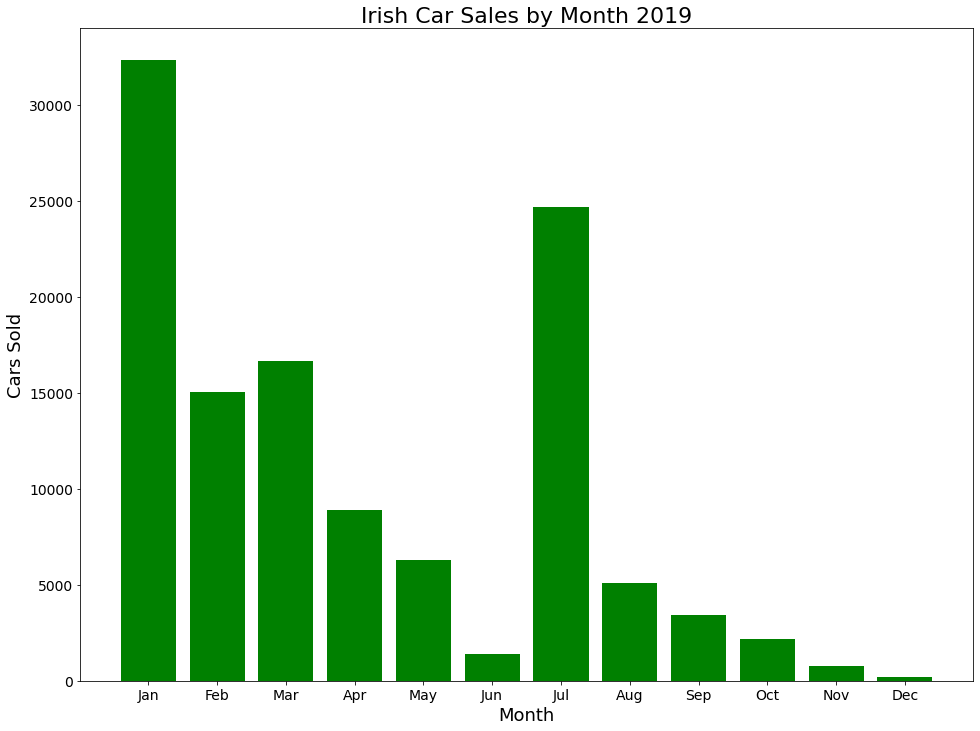

In [160]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and month data from the dataset in green
plt.bar(montly_sales_df.index, montly_sales_df["Sales"], color='green')
# Add labels to the x,y axis and increase size
plt.xlabel('Month', size=18)
plt.ylabel('Cars Sold', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Month 2019", size=22)

The county sales variables will also be taking from SIMI [1]. The dataset can be seen below.

In [161]:
county_sales_df = pd.read_excel("passenger-cars-by-county.xlsx", skiprows=6, usecols="B:D")  

In [162]:
county_sales_df

,County,2019 Units,% Share
0,Carlow,1255,1.07
1,Cavan,1167,1.00
2,Clare,2245,1.92
3,Cork,13981,11.94
4,Donegal,2331,1.99
5,Dublin,52067,44.46
6,Galway,4300,3.67
7,Kerry,2310,1.97
8,Kildare,4452,3.80
9,Kilkenny,2066,1.76


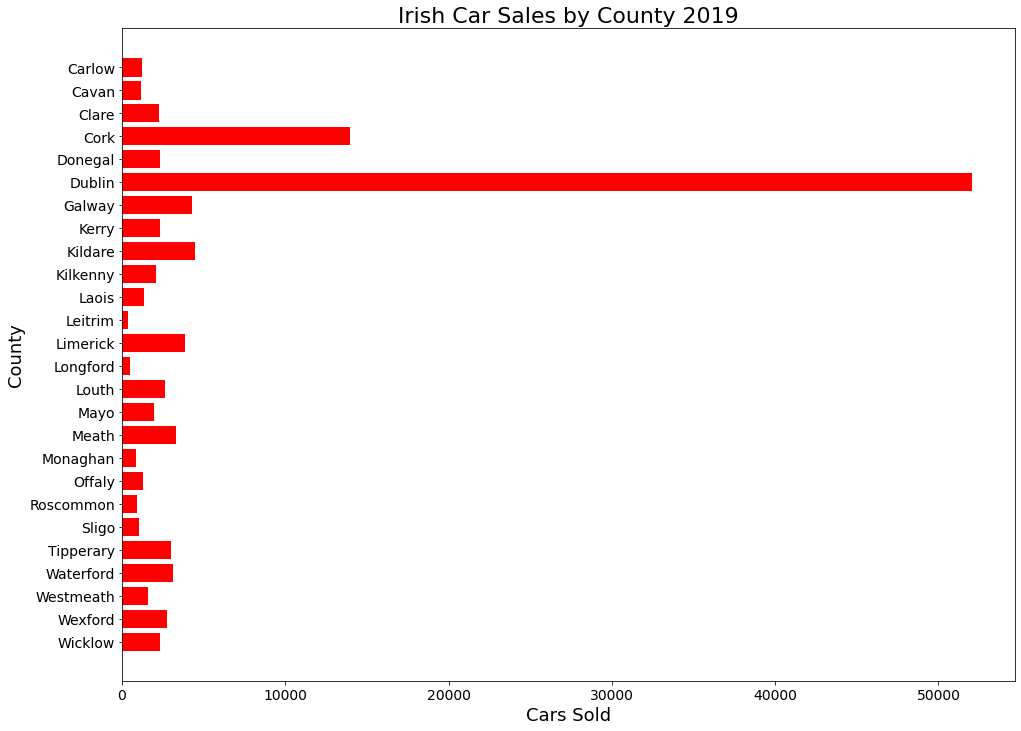

In [163]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and county data from the dataset in red
plt.barh(county_sales_df["County"], county_sales_df["2019 Units"], color='red')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('County', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by County 2019", size=22)
# Reverse order of y axis to match the data alphabetical county order for readability
plt.gca().invert_yaxis()

In [164]:
car_model_sales_df = pd.read_excel("passenger-cars-by-model.xlsx", skiprows=6, usecols="A:E")

In [165]:
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share
0,1,TOYOTA,COROLLA,4406,3.76
1,2,HYUNDAI,TUCSON,3828,3.27
2,3,NISSAN,QASHQAI,3748,3.20
3,4,VOLKSWAGEN,TIGUAN,3201,2.73
4,5,SKODA,OCTAVIA,3199,2.73
5,6,HYUNDAI,KONA,2939,2.51
6,7,VOLKSWAGEN,GOLF,2823,2.41
7,8,FORD,FOCUS,2766,2.36
8,9,TOYOTA,YARIS,2554,2.18
9,10,TOYOTA,C-HR,2503,2.14


In [166]:
# Limit the data the top 12 Cars in 2019 for ease of working with the data.
# This is instead of the 297 differnet makes of car from the data
car_model_sales_df = car_model_sales_df.head(12)

Text(0.5, 1.0, 'Irish Car Sales by Make & Model 2019')

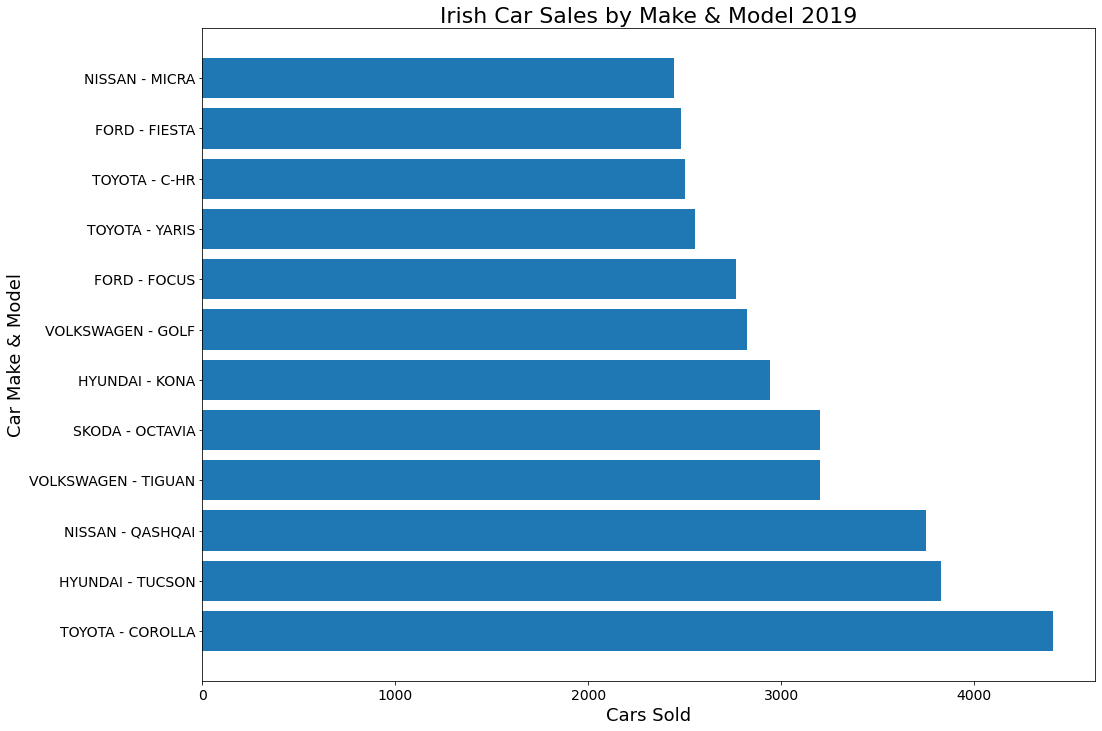

In [167]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and make/model data from the dataset
plt.barh(car_model_sales_df["Make"] + " - " + car_model_sales_df["Model"], car_model_sales_df["2019 Units"])
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Make & Model', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Make & Model 2019", size=22)

### References
[1] Motorstats - Offical Statistics of the Irish Motor Industry
https://stats.beepbeep.ie/

[2] The Society of the Irish Motor Industry Price Data 
https://www.simi.ie/en/motorstats/recommended-price-guide   

[3] Which car colour will have the best impact on resale value?
https://www.junair-spraybooths.co.uk/blog/which-car-colour-is-best-resale-value/

[4] Color Does Matter in Car Resale Value
https://www.iseecars.com/car-color-study#v=2016
 